# AirBnB Build Week Project

## NLP Preprocessing

#### - [My EDA Notebook](https://github.com/BW-TT-158-AirBnB/Data-Science-Unit3-and-Unit4/blob/main/notebooks/BW4_AirBnB_EDA.ipynb)

#### - [My NLP Notebook](https://github.com/BW-TT-158-AirBnB/Data-Science-Unit3-and-Unit4/blob/main/notebooks/BW4_Airbnb_NLP_Notebook.ipynb)

## Links to Raw Cleaned Files

- [Text Features Only](https://raw.githubusercontent.com/BW-TT-158-AirBnB/Data-Science-Unit3-and-Unit4/main/data/amsterdam_txt_feat.csv)

- [Numeric Features Only](https://raw.githubusercontent.com/BW-TT-158-AirBnB/Data-Science-Unit3-and-Unit4/main/data/amsterdam_num_feat.csv)

- [Boolean Features Only](https://raw.githubusercontent.com/BW-TT-158-AirBnB/Data-Science-Unit3-and-Unit4/main/data/amsterdam_bool_feat.csv)

- [Cleaned with All Features](https://raw.githubusercontent.com/BW-TT-158-AirBnB/Data-Science-Unit3-and-Unit4/main/data/amsterdam_list_clean.csv)

## Imports

In [1]:
# Need to install the category_encoders package
!pip install category_encoders

In [2]:
# Standard
import pandas as pd
import numpy as np

# Set DataFrame display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 300)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# NLP
import re
from collections import Counter
import category_encoders as ce
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modeling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# Set random seed for tensorflow
tf.random.set_seed(79)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the Data

- Using the full dataset that I cleaned in my EDA notebook.

In [3]:
# Read in just the cleaned amsterdam file
df_url = 'https://raw.githubusercontent.com/BW-TT-158-AirBnB/Data-Science-Unit3-and-Unit4/main/data/amsterdam_list_clean.csv'
amsterdam = pd.read_csv(df_url)

# Look at the data
print(amsterdam.shape)
amsterdam.head()

(18291, 34)


,description,superhost,total_listings,profile_pic,verified_id,neighborhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,num_of_beds,amenities,price,min_nights,max_nights,available,avail_next_30_days,avail_next_60_days,avail_next_90_days,avail_next_365_days,num_of_reviews,avg_review_score,accuracy_score,cleanliness_score,checkin_score,communication_score,location_score,value_score,instant_bookable,shared_bath,years_hosting
0,"Quiet Garden View Room & Super Fast WiFi<br /><br /><b>The space</b><br />I'm renting a bedroom (room overlooking the garden) in my apartment in Amsterdam, <br /><br />The room is located to the east of the city centre in a quiet, typical Amsterdam neighbourhood the ""Indische Buurt"". Amsterdam’s...",True,1,True,True,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,1.5,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on premises"", ""Long term stays allowed"", ""First aid kit"", ""Bed linens"", ""Lock on bedroom door"", ""Private entrance"", ""Carbon monoxide alarm"", ""Dedicated workspace"", ""Host greets you"", ""Single level home"", ""Extra pillows and blankets"", ""Hot water"", ""Paid p...",59.0,3,1125,True,29,46,60,139,278,98.0,10.0,10.0,10.0,10.0,9.0,10.0,True,True,12.38
1,"17th century Dutch townhouse in the heart of the city. no public transport needed! Located a stones throw from Rembrandt Square, Dam Square, Leidse Square and Flower Market. Walking distance from Central Station.<br />Comfortable, cosy, lockable studio with comfortable bed and with private bathr...",False,2,True,True,Centrum-Oost,52.36509,4.89354,Private room in townhouse,Private room,2,1.0,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Hangers"", ""Smoke alarm"", ""Heating"", ""Paid parking off premises"", ""Free street parking"", ""Refrigerator"", ""Carbon monoxide alarm"", ""Dedicated workspace"", ""Host greets you"", ""TV"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Fire extinguisher""]",129.0,1,365,True,0,0,0,0,339,89.0,10.0,10.0,10.0,10.0,10.0,9.0,True,False,11.19
2,"Lovely apt in Centre ( lift & fireplace) near Jordaan<br /><br /><b>The space</b><br />This nicely furnished, newly renovated apt is very sunny, and spacious with 8 windows. The appliances are fairly new. There are two flat screen TVs, washing machine, dryer, dishwasher, laptop computer, Wi-fi,...",True,2,True,False,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,1.0,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dishes and silverware"", ""Oven"", ""Coffee maker"", ""Long term stays allowed"", ""Bed linens"", ""Dishwasher"", ""Dedicated workspace"", ""Kitchen"", ""Extra pillows and blankets"", ""Hot water"", ""Heating"", ""TV"", ""Cable TV"", ""Hair dryer"", ""Microwave"", ""Essentials"", ""Sm...",125.0,14,180,True,6,36,66,251,5,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,False,11.23
3,"Stylish and romantic houseboat on fantastic historic location with breathtaking view. Wheelhouse, deckhouse and captains room. Central, quiet. Great breakfast, 2 vanMoof design bikes and a Canadian Canoe are included. Just read the reviews on tripadvisor for instance!<br /><br /><b>The space</b...",True,1,True,True,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.5,1.0,1.0,"[""Patio or balcony"", ""Hangers"", ""Dishes and silverware"", ""Luggage dropoff allowed"", ""Breakfast"", ""Coffee maker"", ""Lake access"", ""Long term stays allowed"", ""Private entrance"", ""Waterfront"", ""Carbon monoxide alarm"", ""Dedicated workspace"", ""Hot water"", ""Heating"", ""TV"", ""Hair dryer"", ""Essentials"", ""...",125.0,2,730,True,27,55,79,136,219,99.0,10.0,10.0,10.0,10.0,10.0,10.0,True,False,10.89
4,"<b>The space</b><br />In a monumental house right in the center of Amsterdam, we offer two rooms (one single room and one double room) to visitors who want to enjoy the comfort of a home-like accommodation, plus being in the middle 

## Clean a Little More to get Ready for Model

- There is a little more cleaning that I need to do to get the dataset ready for input into my model. 

- All the features need to be converted to numerical data.

In [4]:
# Look at the stats of my dataframe
amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18291 entries, 0 to 18290
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   description          18291 non-null  object 
 1   superhost            18291 non-null  bool   
 2   total_listings       18291 non-null  int64  
 3   profile_pic          18291 non-null  bool   
 4   verified_id          18291 non-null  bool   
 5   neighborhood         18291 non-null  object 
 6   latitude             18291 non-null  float64
 7   longitude            18291 non-null  float64
 8   property_type        18291 non-null  object 
 9   room_type            18291 non-null  object 
 10  accommodates         18291 non-null  int64  
 11  bathrooms            18291 non-null  float64
 12  bedrooms             18291 non-null  float64
 13  num_of_beds          18291 non-null  float64
 14  amenities            18291 non-null  object 
 15  price                18291 non-null 

### Drop Features Not Needed Right Now

- Need to drop description feature for now, will circle back if time allows.

- Need to also drop a few other features that I don't think will add a lot of value to try to reduce the chance of the curse of dimensionality because I will be using Tfidf vectorizer on the text features.

In [5]:
# Drop features that are not needed right now
amsterdam.drop(columns=['description', 'latitude', 'longitude', 
                         'property_type', 'avail_next_30_days', 
                         'avail_next_60_days', 'avail_next_90_days', 
                         'accuracy_score', 'cleanliness_score', 'checkin_score', 
                         'communication_score', 'location_score', 'value_score'], 
               inplace=True)

# Check my work
print(amsterdam.shape)
amsterdam.info()

(18291, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18291 entries, 0 to 18290
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   superhost            18291 non-null  bool   
 1   total_listings       18291 non-null  int64  
 2   profile_pic          18291 non-null  bool   
 3   verified_id          18291 non-null  bool   
 4   neighborhood         18291 non-null  object 
 5   room_type            18291 non-null  object 
 6   accommodates         18291 non-null  int64  
 7   bathrooms            18291 non-null  float64
 8   bedrooms             18291 non-null  float64
 9   num_of_beds          18291 non-null  float64
 10  amenities            18291 non-null  object 
 11  price                18291 non-null  float64
 12  min_nights           18291 non-null  int64  
 13  max_nights           18291 non-null  int64  
 14  available            18291 non-null  bool   
 15  avail_next_365_days  182

In [6]:
# What is the type of the amenities feature column
type(amsterdam['amenities'])

pandas.core.series.Series

### Vectorize Text Features

- Going to use `TfidfVectorizer` to vectorize my text features.

- Then going to create a document term matrix DataFrame for each feature to merge back into the main dataset later.

In [7]:
# Pull out just the text features for now
txt_feat = amsterdam[['neighborhood', 'room_type', 'amenities']]

In [8]:
# Look at just the text features
txt_feat.head()

,neighborhood,room_type,amenities
0,Oostelijk Havengebied - Indische Buurt,Private room,"[""Hangers"", ""Coffee maker"", ""Paid parking on premises"", ""Long term stays allowed"", ""First aid kit"", ""Bed linens"", ""Lock on bedroom door"", ""Private entrance"", ""Carbon monoxide alarm"", ""Dedicated workspace"", ""Host greets you"", ""Single level home"", ""Extra pillows and blankets"", ""Hot water"", ""Paid p..."
1,Centrum-Oost,Private room,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Hangers"", ""Smoke alarm"", ""Heating"", ""Paid parking off premises"", ""Free street parking"", ""Refrigerator"", ""Carbon monoxide alarm"", ""Dedicated workspace"", ""Host greets you"", ""TV"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Fire extinguisher""]"
2,Centrum-West,Entire home/apt,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dishes and silverware"", ""Oven"", ""Coffee maker"", ""Long term stays allowed"", ""Bed linens"", ""Dishwasher"", ""Dedicated workspace"", ""Kitchen"", ""Extra pillows and blankets"", ""Hot water"", ""Heating"", ""TV"", ""Cable TV"", ""Hair dryer"", ""Microwave"", ""Essentials"", ""Sm..."
3,Centrum-West,Private room,"[""Patio or balcony"", ""Hangers"", ""Dishes and silverware"", ""Luggage dropoff allowed"", ""Breakfast"", ""Coffee maker"", ""Lake access"", ""Long term stays allowed"", ""Private entrance"", ""Waterfront"", ""Carbon monoxide alarm"", ""Dedicated workspace"", ""Hot water"", ""Heating"", ""TV"", ""Hair dryer"", ""Essentials"", ""..."
4,Centrum-Oost,Private room,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Hangers"", ""Heating"", ""Lock on bedroom door"", ""Private entrance"", ""Refrigerator"", ""Carbon monoxide alarm"", ""Host greets you"", ""Shampoo"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Fire extinguisher"", ""Dryer""]"


In [9]:
# Instantiate the Tfidf Vectorizer to vectorize the amenities feature 
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=300,
    max_df=0.6,
    ngram_range=(2, 3),
    max_features=100
)

# Fit the Tfidf vectorizer to just the amenities feature and create a dataframe
#   with the resulting document term matrix
dtm_amen = tfidf.fit_transform(txt_feat['amenities'])
dtm_amen = pd.DataFrame(dtm_amen.todense(), columns=tfidf.get_feature_names())

# Instantiate the Tfidf Vectorizer to vectorize the neighborhood feature
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=5,
    max_df=0.90,
    ngram_range=(1, 3)
)

# Fit the Tfidf vectorizer to just the neighborhood feature and create a 
#   dataframe with the resulting document term matrix
dtm_neigh = tfidf.fit_transform(txt_feat['neighborhood'])
dtm_neigh = pd.DataFrame(dtm_neigh.todense(), columns=tfidf.get_feature_names())

# Instantiate the Tfidf Vectorizer to vectorize the room_type feature
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=5,
    max_df=0.95,
    ngram_range=(1, 3)
)

# Fit the Tfid vecorizer to just the room_type feature and create a dataframe
#   with the resulting document term matrix
dtm_room = tfidf.fit_transform(txt_feat['room_type'])
dtm_room = pd.DataFrame(dtm_room.todense(), columns=tfidf.get_feature_names())

In [10]:
# Look at the amenities feature document term matrix
print(dtm_amen.shape)
dtm_amen.head()

(18291, 100)


,aid kit,alarm dedicated,alarm dedicated workspace,alarm kitchen,alarm stove,alarm stove washer,allowed aid,allowed aid kit,balcony hangers,basics dishes,basics dishes silverware,bed linens,cable tv,cable tv wifi,carbon monoxide,carbon monoxide alarm,coffee maker,coffee maker long,cooking basics,cooking basics dishes,dedicated workspace host,dishes silverware,dishes silverware oven,dishwasher carbon,dishwasher carbon monoxide,dropoff allowed,dryer long,dryer long term,dryer microwave,dryer microwave essentials,extinguisher dryer,extra pillows,extra pillows blankets,hair dryer long,hair dryer microwave,hangers cooking,hangers cooking basics,hangers washer,hangers washer heating,heating tv,...,paid parking,paid parking premises,parking premises,parking premises heating,patio balcony,patio balcony hangers,pillows blankets,premises heating,private entrance,refrigerator iron,refrigerator iron shampoo,shampoo tv,shampoo wifi,shampoo wifi extinguisher,silverware oven,silverware oven coffee,smoke alarm stove,stays allowed aid,stove washer,stove washer refrigerator,tv cable,tv cable tv,tv hair,tv hair dryer,tv wifi,tv wifi hair,tv wifi kitchen,washer heating,washer refrigerator,washer refrigerator iron,water heating,water paid,water paid parking,wifi extinguisher,wifi hair,wifi hair dryer,wifi kitchen,wifi kitchen long,workspace host,workspace host greets
0,0.125067,0.141336,0.141336,0.0,0.000000,0.000000,0.17278,0.17278,0.000000,0.000000,0.000000,0.129064,0.000000,0.0,0.118476,0.118476,0.119876,0.000000,0.000000,0.000000,0.164755,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176138,0.176138,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.288245,0.289143,0.251781,0.167902,0.000000,0.000000,0.176138,0.167739,0.127783,0.136591,0.183442,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.173173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.156084,0.165764,0.000000,0.175583,0.175603,0.159275,0.000000,0.000000,0.0,0.0,0.164755,0.164755
1,0.000000,0.208325,0.208325,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.190236,0.000000,0.0,0.174631,0.174631,0.000000,0.000000,0.000000,0.000000,0.242845,0.000000,0.000000,0.0,0.0,0.000000,0.246499,0.246499,0.000000,0.000000,0.000000,0.000000,0.000000,0.246870,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.212432,0.213094,0.185559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189531,0.244512,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212524,0.212524,0.0,0.0,0.242845,0.242845
2,0.000000,0.000000,0.000000,0.0,0.143755,0.155314,0.00000,0.00000,0.000000,0.140321,0.140321,0.125041,0.125164,0.0,0.000000,0.000000,0.116139,0.173159,0.121052,0.140321,0.000000,0.108391,0.154004,0.0,0.0,0.000000,0.000000,0.000000,0.155924,0.160818,0.176765,0.170647,0.170647,0.000000,0.155924,0.0,0.0,0.0,0.0,0.138994,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170647,0.000000,0.000000,0.132333,0.000000,0.0,0.116692,0.173389,0.154004,0.171697,0.143768,0.000000,0.146767,0.164867,0.134267,0.134267,0.146672,0.146672,0.000000,0.000000,0.0,0.0,0.151218,0.160596,0.176765,0.000000,0.000000,0.154310,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.203121,0.203121,0.0,0.000000,0.000000,0.00000,0.00000,0.254753,0.000000,0.000000,0.000000,0.000000,0.0,0.170268,0.170268,0.172279,0.000000,0.000000,0.000000,0.000000,0.160787,0.000000,0.0,0.0,0.257358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.206182,...,0.000000,0.000000,0.000000,0.000000,0.212977,0.254753,0.000000,0.000000,0.183643,0.000000,0.000000,0.0,0.173099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217572,0.217572,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.262211,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00

In [11]:
# Look at the neighborhood feature document term matrix
print(dtm_neigh.shape)
dtm_neigh.head()

(18291, 59)


,aker,aker nieuw,aker nieuw sloten,baarsjes,baarsjes oud,baarsjes oud west,bijlmer,bijlmer centrum,bijlmer oost,bos,bos en,bos en lommer,buitenveldert,buitenveldert zuidas,buurt,centrum,centrum oost,centrum west,driemond,en,en lommer,gaasperdam,gaasperdam driemond,geuzenveld,geuzenveld slotermeer,havengebied,havengebied indische,havengebied indische buurt,ijburg,ijburg zeeburgereiland,indische,indische buurt,lommer,nieuw,nieuw sloten,noord,noord oost,noord west,oost,oostelijk,oostelijk havengebied,oostelijk havengebied indische,osdorp,oud,oud noord,oud oost,oud west,pijp,pijp rivierenbuurt,rivierenbuurt,sloten,slotermeer,slotervaart,watergraafsmeer,west,westerpark,zeeburgereiland,zuid,zuidas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.506661,0.672425,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.539574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.555496,0.000000,0.684344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472332,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.555496,0.000000,0.684344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472332,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.506661,0.672425,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.539574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
# Look at the room_type feature document term matrix
print(dtm_room.shape)
dtm_room.head()

(18291, 13)


,apt,entire,entire home,entire home apt,home,home apt,hotel,hotel room,private,private room,room,shared,shared room
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
2,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0


### Merge all DataFrames Together

- Need to merge all DataFrames back together.

- Then drop the text features original columns.

In [13]:
# Merge all the document term matrices with the amsterdam dataframe
amsterdam_vects = pd.concat([amsterdam, dtm_amen, dtm_neigh, dtm_room], axis=1)

# Look at the new dataframe with the merged dataframes
print(amsterdam_vects.shape)
amsterdam_vects.head()

(18291, 193)


,superhost,total_listings,profile_pic,verified_id,neighborhood,room_type,accommodates,bathrooms,bedrooms,num_of_beds,amenities,price,min_nights,max_nights,available,avail_next_365_days,num_of_reviews,avg_review_score,instant_bookable,shared_bath,years_hosting,aid kit,alarm dedicated,alarm dedicated workspace,alarm kitchen,alarm stove,alarm stove washer,allowed aid,allowed aid kit,balcony hangers,basics dishes,basics dishes silverware,bed linens,cable tv,cable tv wifi,carbon monoxide,carbon monoxide alarm,coffee maker,coffee maker long,cooking basics,...,lommer,nieuw,nieuw sloten,noord,noord oost,noord west,oost,oostelijk,oostelijk havengebied,oostelijk havengebied indische,osdorp,oud,oud noord,oud oost,oud west,pijp,pijp rivierenbuurt,rivierenbuurt,sloten,slotermeer,slotervaart,watergraafsmeer,west,westerpark,zeeburgereiland,zuid,zuidas,apt,entire,entire home,entire home apt,home,home apt,hotel,hotel room,private,private room,room,shared,shared room
0,True,1,True,True,Oostelijk Havengebied - Indische Buurt,Private room,2,1.5,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Paid parking on premises"", ""Long term stays allowed"", ""First aid kit"", ""Bed linens"", ""Lock on bedroom door"", ""Private entrance"", ""Carbon monoxide alarm"", ""Dedicated workspace"", ""Host greets you"", ""Single level home"", ""Extra pillows and blankets"", ""Hot water"", ""Paid p...",59.0,3,1125,True,139,278,98.0,True,True,12.38,0.125067,0.141336,0.141336,0.0,0.000000,0.000000,0.17278,0.17278,0.000000,0.000000,0.000000,0.129064,0.000000,0.0,0.118476,0.118476,0.119876,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
1,False,2,True,True,Centrum-Oost,Private room,2,1.0,1.0,1.0,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Hangers"", ""Smoke alarm"", ""Heating"", ""Paid parking off premises"", ""Free street parking"", ""Refrigerator"", ""Carbon monoxide alarm"", ""Dedicated workspace"", ""Host greets you"", ""TV"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Fire extinguisher""]",129.0,1,365,True,0,339,89.0,True,False,11.19,0.000000,0.208325,0.208325,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.190236,0.000000,0.0,0.174631,0.174631,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.539574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
2,True,2,True,False,Centrum-West,Entire home/apt,3,1.0,1.0,1.0,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dishes and silverware"", ""Oven"", ""Coffee maker"", ""Long term stays allowed"", ""Bed linens"", ""Dishwasher"", ""Dedicated workspace"", ""Kitchen"", ""Extra pillows and blankets"", ""Hot water"", ""Heating"", ""TV"", ""Cable TV"", ""Hair dryer"", ""Microwave"", ""Essentials"", ""Sm...",125.0,14,180,True,251,5,100.0,False,False,11.23,0.000000,0.000000,0.000000,0.0,0.143755,0.155314,0.00000,0.00000,0.000000,0.140321,0.140321,0.125041,0.125164,0.0,0.000000,0.000000,0.116139,0.173159,0.121052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472332,0.0,0.0,0.0,0.0,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,True,1,True,True,Centrum-West,Private room,2,1.5,1.0,1.0,"[""Patio or balcony"", ""Hangers"", ""Dishes and silverware"", ""Luggage dropoff allowed"", ""Breakfast"", ""Coffee maker"", ""Lake access"", ""Long term stays allowed"", ""Private entrance"", ""Waterfront"", ""Carbon monoxide alarm"", ""Dedicated workspace"", ""Hot water"", ""Heating"", ""TV"", ""Hair dryer"", ""Essentials"", ""...",125.0,2,730,True,136,219,99.0,True,False,10.89,0.000000,0.203121,0.203121,0.0,0.000000,0.000000,0.00000,0.00000,0.25

In [14]:
# Drop the columns I vectorized and merged back into dataframe
amsterdam_vects = amsterdam_vects.drop(columns=['neighborhood', 'room_type', 
                                               'amenities'])

# Check my work
print(amsterdam_vects.shape)
amsterdam_vects.head()

(18291, 190)


,superhost,total_listings,profile_pic,verified_id,accommodates,bathrooms,bedrooms,num_of_beds,price,min_nights,max_nights,available,avail_next_365_days,num_of_reviews,avg_review_score,instant_bookable,shared_bath,years_hosting,aid kit,alarm dedicated,alarm dedicated workspace,alarm kitchen,alarm stove,alarm stove washer,allowed aid,allowed aid kit,balcony hangers,basics dishes,basics dishes silverware,bed linens,cable tv,cable tv wifi,carbon monoxide,carbon monoxide alarm,coffee maker,coffee maker long,cooking basics,cooking basics dishes,dedicated workspace host,dishes silverware,...,lommer,nieuw,nieuw sloten,noord,noord oost,noord west,oost,oostelijk,oostelijk havengebied,oostelijk havengebied indische,osdorp,oud,oud noord,oud oost,oud west,pijp,pijp rivierenbuurt,rivierenbuurt,sloten,slotermeer,slotervaart,watergraafsmeer,west,westerpark,zeeburgereiland,zuid,zuidas,apt,entire,entire home,entire home apt,home,home apt,hotel,hotel room,private,private room,room,shared,shared room
0,True,1,True,True,2,1.5,1.0,2.0,59.0,3,1125,True,139,278,98.0,True,True,12.38,0.125067,0.141336,0.141336,0.0,0.000000,0.000000,0.17278,0.17278,0.000000,0.000000,0.000000,0.129064,0.000000,0.0,0.118476,0.118476,0.119876,0.000000,0.000000,0.000000,0.164755,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
1,False,2,True,True,2,1.0,1.0,1.0,129.0,1,365,True,0,339,89.0,True,False,11.19,0.000000,0.208325,0.208325,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.190236,0.000000,0.0,0.174631,0.174631,0.000000,0.000000,0.000000,0.000000,0.242845,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.539574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
2,True,2,True,False,3,1.0,1.0,1.0,125.0,14,180,True,251,5,100.0,False,False,11.23,0.000000,0.000000,0.000000,0.0,0.143755,0.155314,0.00000,0.00000,0.000000,0.140321,0.140321,0.125041,0.125164,0.0,0.000000,0.000000,0.116139,0.173159,0.121052,0.140321,0.000000,0.108391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472332,0.0,0.0,0.0,0.0,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,True,1,True,True,2,1.5,1.0,1.0,125.0,2,730,True,136,219,99.0,True,False,10.89,0.000000,0.203121,0.203121,0.0,0.000000,0.000000,0.00000,0.00000,0.254753,0.000000,0.000000,0.000000,0.000000,0.0,0.170268,0.170268,0.172279,0.000000,0.000000,0.000000,0.000000,0.160787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472332,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
4,True,2,True,True,2,1.0,1.0,1.0,75.0,2,1825,True,338,336,97.0,False,True,10.75,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.230281,0.230281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.539574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0


### Replace True/False values with 1's and 0's

- All data being passed into the model needs to me numeric. 

- The model will not convert the `bool` features to numeric for me, so I need to complete this step before passing into the model.

In [15]:
# Numerical representation on True and False
amsterdam_vects = amsterdam_vects.replace([True, False], [1, 0])

# Check my work
amsterdam_vects.head()

,superhost,total_listings,profile_pic,verified_id,accommodates,bathrooms,bedrooms,num_of_beds,price,min_nights,max_nights,available,avail_next_365_days,num_of_reviews,avg_review_score,instant_bookable,shared_bath,years_hosting,aid kit,alarm dedicated,alarm dedicated workspace,alarm kitchen,alarm stove,alarm stove washer,allowed aid,allowed aid kit,balcony hangers,basics dishes,basics dishes silverware,bed linens,cable tv,cable tv wifi,carbon monoxide,carbon monoxide alarm,coffee maker,coffee maker long,cooking basics,cooking basics dishes,dedicated workspace host,dishes silverware,...,lommer,nieuw,nieuw sloten,noord,noord oost,noord west,oost,oostelijk,oostelijk havengebied,oostelijk havengebied indische,osdorp,oud,oud noord,oud oost,oud west,pijp,pijp rivierenbuurt,rivierenbuurt,sloten,slotermeer,slotervaart,watergraafsmeer,west,westerpark,zeeburgereiland,zuid,zuidas,apt,entire,entire home,entire home apt,home,home apt,hotel,hotel room,private,private room,room,shared,shared room
0,1,1,1,1,2,1.5,1.0,2.0,59.0,3,1125,1,139,278,98.0,1,1,12.38,0.125067,0.141336,0.141336,0.0,0.000000,0.000000,0.17278,0.17278,0.000000,0.000000,0.000000,0.129064,0.000000,0.0,0.118476,0.118476,0.119876,0.000000,0.000000,0.000000,0.164755,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
1,0,2,1,1,2,1.0,1.0,1.0,129.0,1,365,1,0,339,89.0,1,0,11.19,0.000000,0.208325,0.208325,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.190236,0.000000,0.0,0.174631,0.174631,0.000000,0.000000,0.000000,0.000000,0.242845,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.539574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
2,1,2,1,0,3,1.0,1.0,1.0,125.0,14,180,1,251,5,100.0,0,0,11.23,0.000000,0.000000,0.000000,0.0,0.143755,0.155314,0.00000,0.00000,0.000000,0.140321,0.140321,0.125041,0.125164,0.0,0.000000,0.000000,0.116139,0.173159,0.121052,0.140321,0.000000,0.108391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472332,0.0,0.0,0.0,0.0,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,1,1,1,1,2,1.5,1.0,1.0,125.0,2,730,1,136,219,99.0,1,0,10.89,0.000000,0.203121,0.203121,0.0,0.000000,0.000000,0.00000,0.00000,0.254753,0.000000,0.000000,0.000000,0.000000,0.0,0.170268,0.170268,0.172279,0.000000,0.000000,0.000000,0.000000,0.160787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472332,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0
4,1,2,1,1,2,1.0,1.0,1.0,75.0,2,1825,1,338,336,97.0,0,1,10.75,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.230281,0.230281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.539574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.580741,0.580741,0.570509,0.0,0.0


### Split Data into Target and Features

- Before I can scale my data, I have to remove the target feature from my other features

In [16]:
# Seperate the features from the target
y = amsterdam_vects['price']
X = amsterdam_vects.drop(columns='price')

# Check my work
y.shape, X.shape

((18291,), (18291, 189))

## Scale my Data

- My data needs to be scaled to normalize it across the whole dataframe since I have document term matrices included in with the main data.

In [17]:
# Need to scale the data across the whole dataframe before running it through
#   the model. I am using Standard Scaler to scale my data
# Instantiate the Standard Scaler
scaler = StandardScaler()

# Fit and transform my features dataframe with the scaler
X_scaled = scaler.fit_transform(X)

# Check my work
print(X_scaled.shape)
X_scaled

(18291, 189)


array([[ 2.5862182 , -0.0395431 ,  0.07110009, ...,  1.92960364,
        -0.0523553 , -0.0523553 ],
       [-0.38666498, -0.02183684,  0.07110009, ...,  1.92960364,
        -0.0523553 , -0.0523553 ],
       [ 2.5862182 , -0.02183684,  0.07110009, ..., -0.52576792,
        -0.0523553 , -0.0523553 ],
       ...,
       [-0.38666498, -0.0395431 ,  0.07110009, ..., -0.52576792,
        -0.0523553 , -0.0523553 ],
       [-0.38666498, -0.0395431 ,  0.07110009, ..., -0.52576792,
        -0.0523553 , -0.0523553 ],
       [ 2.5862182 ,  0.10210694,  0.07110009, ..., -0.52576792,
        -0.0523553 , -0.0523553 ]])

In [18]:
# Want to make sure there are no null values in the array
X_scaled = np.nan_to_num(X_scaled)

In [19]:
# Check my work
X_scaled

array([[ 2.5862182 , -0.0395431 ,  0.07110009, ...,  1.92960364,
        -0.0523553 , -0.0523553 ],
       [-0.38666498, -0.02183684,  0.07110009, ...,  1.92960364,
        -0.0523553 , -0.0523553 ],
       [ 2.5862182 , -0.02183684,  0.07110009, ..., -0.52576792,
        -0.0523553 , -0.0523553 ],
       ...,
       [-0.38666498, -0.0395431 ,  0.07110009, ..., -0.52576792,
        -0.0523553 , -0.0523553 ],
       [-0.38666498, -0.0395431 ,  0.07110009, ..., -0.52576792,
        -0.0523553 , -0.0523553 ],
       [ 2.5862182 ,  0.10210694,  0.07110009, ..., -0.52576792,
        -0.0523553 , -0.0523553 ]])

## Train Test Split

- Want to split my training data into train and test sets so that I have some data that the model has not seen before to evaluate my final model. 

- I am choosing to do a 90/10 split.

In [20]:
# Split my data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.1,
                                                    random_state=79)

# Check my work by looking at the shapes of the train and test sets
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}')
print(f'X_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (16461, 189)
y_train: (16461,)
X_test: (1830, 189)
y_test: (1830,)


## Baseline Model

- This is just a basic (vanilla) model to get my baseline score so that I have something to compare my models to.

- Instantiate a `Sequenial` model with an input layer, 1 dense layer, and an output layer.

- Use `'mean_squared_error'` as my `loss` function since this is a regression problem.

- Use `adam` for my `optimizer`.

- Going to use `'mae'` for my metric.

- Also want to have a `validation_split` on my training data because I do not want to validate against the test data until I have my final model.

In [21]:
# Set up the architechure for my baseline (vanilla) model
base = Sequential([
        Dense(189, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)
])

# Compile my baseline model
base.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mae'])

# Fit my baseline model to get my baseline mean absolute error
baseline = base.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_split=0.1)

Epoch 1/5
463/463 [==============================] - 2s 4ms/step - loss: 33853.7033 - mae: 111.5652 - val_loss: 10839.0410 - val_mae: 54.6666
Epoch 2/5
463/463 [==============================] - 1s 3ms/step - loss: 17330.0680 - mae: 53.9135 - val_loss: 10027.4531 - val_mae: 51.1431
Epoch 3/5
463/463 [==============================] - 1s 3ms/step - loss: 20730.3470 - mae: 52.4064 - val_loss: 9723.3076 - val_mae: 49.1231
Epoch 4/5
463/463 [==============================] - 1s 3ms/step - loss: 18603.6298 - mae: 50.0850 - val_loss: 9535.8740 - val_mae: 49.2274
Epoch 5/5
463/463 [==============================] - 1s 3ms/step - loss: 14626.4709 - mae: 48.5153 - val_loss: 9424.0234 - val_mae: 48.7918


In [22]:
# Get my baseline validation mean absolute error score
base_score = baseline.history['val_mae'][-1]
base_score

48.791831970214844

## Modeling Approach #1

- Create a Sequential model.

- Input layer + 3 hidden layers + output layer.

- Use `'relu'` as the activation function for input layer and all hidden layers and no activation for the output layer since this is a regression problem.

- Start with `256` neurons and decriment each subsequent layer by half.

- Going to only have `1` neuron for the output layer.

- Use `'mean_squared_error'` for the `loss` function.

- Use `'nadam'` for the `optimizer`.

- Going to look at the `'mae'` (mean absolute error) for the measuring metric.

- Going to use a `batch_size` of `64`.

- Going to have the model train for `30 epochs`.

- Even though I have done a train/test split already, I want to have a validation split of `10%` from the training data becuase I do not want to use the test set to evaluate on until I have my final model done.

In [23]:
# Instatiate my first model approach
model1 = Sequential([
            Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)
])

# Compile my first model approach
model1.compile(loss='mean_squared_error',
               optimizer='nadam',
               metrics=['mae'])

# Fit my first model approach
mod1 = model1.fit(X_train, y_train,
                  batch_size=64,
                  epochs=50,
                  validation_split=0.1)

Epoch 1/50
232/232 [==============================] - 3s 6ms/step - loss: 28491.7960 - mae: 90.5328 - val_loss: 9677.2461 - val_mae: 49.7730
Epoch 2/50
232/232 [==============================] - 1s 5ms/step - loss: 16765.2311 - mae: 49.6752 - val_loss: 9501.7080 - val_mae: 49.5093
Epoch 3/50
232/232 [==============================] - 1s 4ms/step - loss: 20035.2934 - mae: 50.7311 - val_loss: 9380.1025 - val_mae: 48.0273
Epoch 4/50
232/232 [==============================] - 1s 5ms/step - loss: 18153.0849 - mae: 49.6867 - val_loss: 9320.7754 - val_mae: 48.1272
Epoch 5/50
232/232 [==============================] - 1s 5ms/step - loss: 14379.2115 - mae: 48.2690 - val_loss: 9357.2861 - val_mae: 48.6822
Epoch 6/50
232/232 [==============================] - 1s 5ms/step - loss: 18722.9403 - mae: 50.1401 - val_loss: 9348.7334 - val_mae: 47.1501
Epoch 7/50
232/232 [==============================] - 1s 6ms/step - loss: 20743.3448 - mae: 50.2333 - val_loss: 9449.7012 - val_mae: 51.2601
Epoch 8/50
23

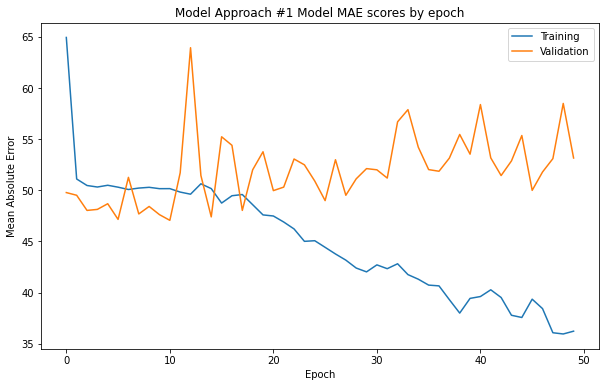

In [24]:
# Plot out the changes per epoch for the training and validation mae
plt.figure(figsize=(10,6))
plt.plot(mod1.epoch, mod1.history['mae'], label='Training')
plt.plot(mod1.epoch, mod1.history['val_mae'], label='Validation')
plt.legend()
plt.title('Model Approach #1 Model MAE scores by epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error');

## Modeling Approach #2
- Keeping everything the same as 1st approach but I am going to change the `optimizer` to `'adam'` to see if that changes anything.

In [25]:
# Instatiate my 2nd model approach
model2 = Sequential([
            Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)
])

# Compile my 2nd model approach
model2.compile(loss='mean_squared_error',
               optimizer='adam',
               metrics=['mae'])

# Fit my 2nd model approach
mod2 = model2.fit(X_train, y_train,
                  batch_size=64,
                  epochs=50,
                  validation_split=0.1)

Epoch 1/50
232/232 [==============================] - 1s 4ms/step - loss: 27604.6268 - mae: 87.5138 - val_loss: 9812.4453 - val_mae: 47.6304
Epoch 2/50
232/232 [==============================] - 1s 3ms/step - loss: 16720.0289 - mae: 49.6304 - val_loss: 9573.7168 - val_mae: 51.6055
Epoch 3/50
232/232 [==============================] - 1s 3ms/step - loss: 20036.9324 - mae: 50.7510 - val_loss: 9366.7998 - val_mae: 48.9158
Epoch 4/50
232/232 [==============================] - 1s 3ms/step - loss: 18144.2993 - mae: 49.8042 - val_loss: 9418.8223 - val_mae: 47.7097
Epoch 5/50
232/232 [==============================] - 1s 3ms/step - loss: 14401.4476 - mae: 48.7329 - val_loss: 9351.5596 - val_mae: 50.3420
Epoch 6/50
232/232 [==============================] - 1s 3ms/step - loss: 18652.3667 - mae: 50.3322 - val_loss: 9277.3047 - val_mae: 47.6902
Epoch 7/50
232/232 [==============================] - 1s 3ms/step - loss: 20773.2821 - mae: 50.7495 - val_loss: 9309.3760 - val_mae: 47.8928
Epoch 8/50
23

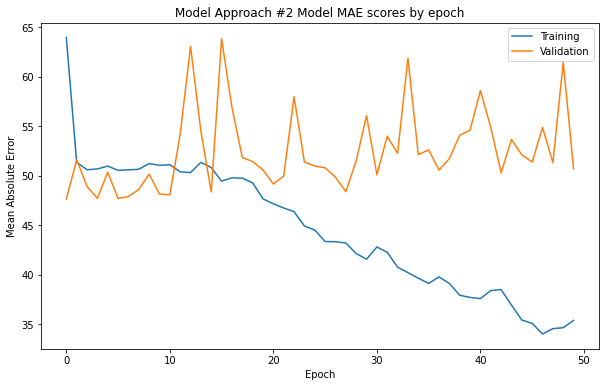

In [26]:
# Plot out the changes per epoch for the training and validation mae
plt.figure(figsize=(10,6))
plt.plot(mod2.epoch, mod2.history['mae'], label='Training')
plt.plot(mod2.epoch, mod2.history['val_mae'], label='Validation')
plt.legend()
plt.title('Model Approach #2 Model MAE scores by epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error');

## Modeling Approach #3
- Keeping everything the same as my 2nd approach as it seems to have preform slightly better then my 1st approach but it is still overfitting.

- Going to add `early stopping`.

- Also going to increase the `batch_size` to `128`.

In [27]:
# Create early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae', min_delta=0.5, patience=10, restore_best_weights=True
)

In [28]:
# Instatiate my 3rd model approach
model3 = Sequential([
            Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)
])

# Compile my 2nd model approach
model3.compile(loss='mean_squared_error',
               optimizer='adam',
               metrics=['mae'])

# Fit my 2nd model approach
mod3 = model3.fit(X_train, y_train,
                  batch_size=128,
                  epochs=300,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/300
116/116 [==============================] - 1s 5ms/step - loss: 32575.0346 - mae: 107.3793 - val_loss: 10095.2559 - val_mae: 50.1357
Epoch 2/300
116/116 [==============================] - 0s 3ms/step - loss: 16956.2089 - mae: 50.3947 - val_loss: 9698.1631 - val_mae: 50.5885
Epoch 3/300
116/116 [==============================] - 0s 3ms/step - loss: 20158.1600 - mae: 51.3414 - val_loss: 9499.1436 - val_mae: 50.3458
Epoch 4/300
116/116 [==============================] - 0s 4ms/step - loss: 18251.9557 - mae: 49.8599 - val_loss: 9497.6973 - val_mae: 47.5247
Epoch 5/300
116/116 [==============================] - 0s 4ms/step - loss: 14549.4690 - mae: 48.0893 - val_loss: 9340.2773 - val_mae: 49.0252
Epoch 6/300
116/116 [==============================] - 0s 4ms/step - loss: 18654.0568 - mae: 50.0051 - val_loss: 9758.5928 - val_mae: 47.5001
Epoch 7/300
116/116 [==============================] - 0s 3ms/step - loss: 20887.7385 - mae: 50.1802 - val_loss: 9332.8584 - val_mae: 47.9528
Epoc

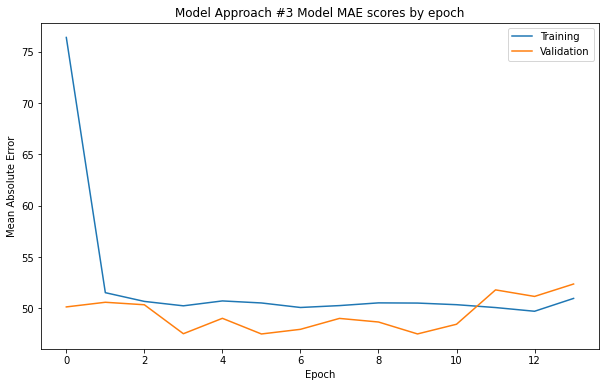

In [29]:
# Plot out the changes per epoch for the training and validation mae
plt.figure(figsize=(10,6))
plt.plot(mod3.epoch, mod3.history['mae'], label='Training')
plt.plot(mod3.epoch, mod3.history['val_mae'], label='Validation')
plt.legend()
plt.title('Model Approach #3 Model MAE scores by epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error');

* This appears to be my best model thus far, however, I believe there can be improvement on this model. 

* At approximately a `$51 - $53` difference between the predicted value and the true value, that can make a huge difference in the real world. 

* When doing my EDA I did notice that there seems to be some outliers, so this is where I will start, by identifying and removing outliers, to try to improve upon this model.

### Identify and Remove Outliers
- Need to identify and remove outliers in the price feature to avoid adding bias to my model.


In [30]:
# Look at the stats for the price feature
amsterdam_vects['price'].describe()

count    18291.000000
mean       153.055984
std        163.034869
min          0.000000
25%         95.000000
50%        128.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64

In [31]:
# Assign the mean for the price feature to a variable
price_mean = amsterdam_vects['price'].mean()
price_mean

153.05598381717786

In [32]:
# Assign the standard divation for the price feature to a variable
price_std = amsterdam_vects['price'].std()
price_std

163.03486910521414

In [33]:
# Get my approximate upper bounds
price_mean + price_std

316.090852922392

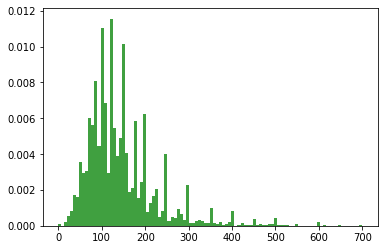

In [34]:
# Look at the distribution of the prices from 0 - 700
# Use this to see where my outliers are that are under 700
plt.hist(amsterdam_vects['price'], 100, density=True,
         facecolor='g', alpha=0.75, range=(-1, 700));

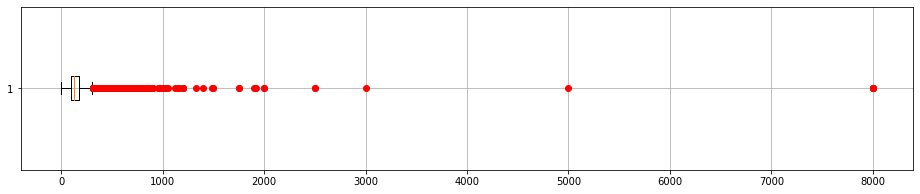

In [35]:
# Plot the stats out using a boxplot
fig, ax = plt.subplots(figsize=(16, 3))
ax.boxplot(amsterdam_vects['price'], 0, 'ro', 0)
ax.grid(True);

In [36]:
# Drop all rows where the price is less than 1250
amsterdam_vects = amsterdam_vects[amsterdam_vects['price'] < 1250]
amsterdam_vects.shape

(18272, 190)

In [37]:
# Look at the new stats for the price feature
amsterdam_vects['price'].describe()

count    18272.000000
mean       149.737248
std         96.622713
min          0.000000
25%         95.000000
50%        127.000000
75%        180.000000
max       1200.000000
Name: price, dtype: float64

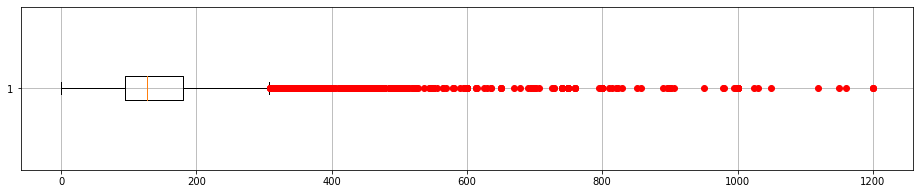

In [38]:
# Plot the stats using a box plot
fig, ax = plt.subplots(figsize=(16, 3))
ax.boxplot(amsterdam_vects['price'], 0, 'ro', 0)
ax.grid(True);

In [39]:
# Since the line is pretty solid when less than 600
# Drop all rows where the price is more than 600
amsterdam_vects = amsterdam_vects[amsterdam_vects['price'] < 600]
amsterdam_vects.shape

(18157, 190)

In [40]:
# Look at the new stats
amsterdam_vects['price'].describe()

count    18157.000000
mean       145.590571
std         80.621390
min          0.000000
25%         95.000000
50%        126.000000
75%        179.000000
max        599.000000
Name: price, dtype: float64

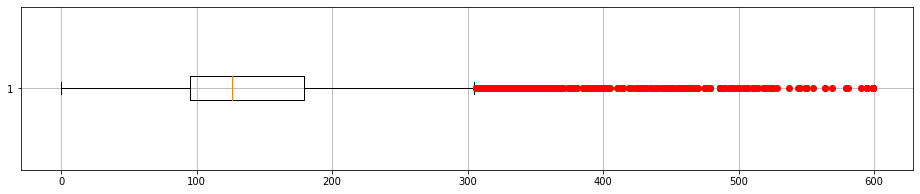

In [41]:
# Plot the new stats using a boxplot
fig, ax = plt.subplots(figsize=(16, 3))
ax.boxplot(amsterdam_vects['price'], 0, 'ro', 0)
ax.grid(True);

* Still have quite a few outliers. So, going to do one more reduction.

In [42]:
# Find out what my approximate upper bounds is
price_mean + price_std

316.090852922392

In [43]:
# Drop all rows where the price is more than 480
amsterdam_vects = amsterdam_vects[amsterdam_vects['price'] < 316]
amsterdam_vects.shape

(17415, 190)

In [44]:
# Look at the new stats
amsterdam_vects['price'].describe()

count    17415.000000
mean       134.533391
std         59.826549
min          0.000000
25%         90.000000
50%        125.000000
75%        170.000000
max        315.000000
Name: price, dtype: float64

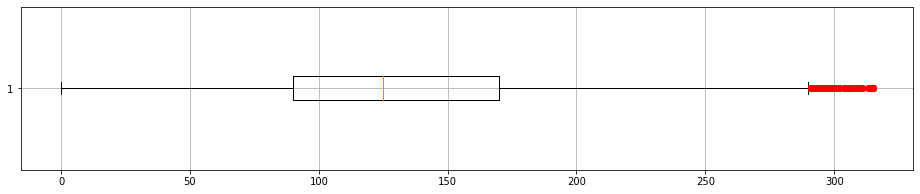

In [45]:
# Plot the new stats using a boxplot
fig, ax = plt.subplots(figsize=(16, 3))
ax.boxplot(amsterdam_vects['price'], 0, 'ro', 0)
ax.grid(True);

### Split Data into Target and Features

- Before I can scale my data, I have to remove the target feature from my other features

In [46]:
# Seperate the features from the target
y = amsterdam_vects['price']
X = amsterdam_vects.drop(columns='price')

# Check my work
y.shape, X.shape

((17415,), (17415, 189))

## Scale my Data

- My data needs to be scaled to normalize it across the whole dataframe since I have document term matrices included in with the main data.

- Using `StandardScaler` to scale my data.

In [47]:
# Instantiate the Standard Scaler
scaler = StandardScaler()

# Fit and transform my features dataframe with the scaler
X_scaled = scaler.fit_transform(X)

# Check my work
print(X_scaled.shape)
X_scaled

(17415, 189)


array([[ 2.59086424, -0.03870533,  0.07085743, ...,  1.88551997,
        -0.05202044, -0.05202044],
       [-0.38597159, -0.02137169,  0.07085743, ...,  1.88551997,
        -0.05202044, -0.05202044],
       [ 2.59086424, -0.02137169,  0.07085743, ..., -0.53779291,
        -0.05202044, -0.05202044],
       ...,
       [-0.38597159, -0.03870533,  0.07085743, ..., -0.53779291,
        -0.05202044, -0.05202044],
       [-0.38597159, -0.03870533,  0.07085743, ..., -0.53779291,
        -0.05202044, -0.05202044],
       [ 2.59086424,  0.0999638 ,  0.07085743, ..., -0.53779291,
        -0.05202044, -0.05202044]])

In [48]:
# Make sure there are no null values in the array
X_scaled = np.nan_to_num(X_scaled)

In [49]:
X_scaled

array([[ 2.59086424, -0.03870533,  0.07085743, ...,  1.88551997,
        -0.05202044, -0.05202044],
       [-0.38597159, -0.02137169,  0.07085743, ...,  1.88551997,
        -0.05202044, -0.05202044],
       [ 2.59086424, -0.02137169,  0.07085743, ..., -0.53779291,
        -0.05202044, -0.05202044],
       ...,
       [-0.38597159, -0.03870533,  0.07085743, ..., -0.53779291,
        -0.05202044, -0.05202044],
       [-0.38597159, -0.03870533,  0.07085743, ..., -0.53779291,
        -0.05202044, -0.05202044],
       [ 2.59086424,  0.0999638 ,  0.07085743, ..., -0.53779291,
        -0.05202044, -0.05202044]])

## Train Test Split

- Want to split my training data into train and test sets so that I have some data that the model has not seen before to evaluate my final model. 

- I am choosing to do a 90/10 split.

In [50]:
# Split my data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.1,
                                                    random_state=79)

# Check my work by looking at the shapes of the train and test sets
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}')
print(f'X_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (15673, 189)
y_train: (15673,)
X_test: (1742, 189)
y_test: (1742,)


## Modeling Approach #4
- Going to use the same model from approach 3 as it was my best model thus far.

- Going to use the data where I have removed the outliers to see if that improves my model's prediction.

In [51]:
# Create early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae', min_delta=0.75, patience=10, restore_best_weights=True
)

In [52]:
# Instatiate my 4th model approach
model4 = Sequential([
            Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)
])

# Compile my 2nd model approach
model4.compile(loss='mean_squared_error',
               optimizer='adam',
               metrics=['mae'])

# Fit my 2nd model approach
mod4 = model4.fit(X_train, y_train,
                  batch_size=128,
                  epochs=300,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/300
111/111 [==============================] - 1s 5ms/step - loss: 10750.4646 - mae: 82.0978 - val_loss: 2695.1750 - val_mae: 36.5230
Epoch 2/300
111/111 [==============================] - 0s 3ms/step - loss: 2195.9731 - mae: 35.2233 - val_loss: 2516.7573 - val_mae: 35.3514
Epoch 3/300
111/111 [==============================] - 0s 4ms/step - loss: 2053.5617 - mae: 34.1829 - val_loss: 2483.0737 - val_mae: 35.2147
Epoch 4/300
111/111 [==============================] - 0s 3ms/step - loss: 2027.3082 - mae: 33.7473 - val_loss: 2420.3108 - val_mae: 34.9747
Epoch 5/300
111/111 [==============================] - 0s 3ms/step - loss: 1996.5384 - mae: 33.8017 - val_loss: 2407.0876 - val_mae: 35.2634
Epoch 6/300
111/111 [==============================] - 0s 3ms/step - loss: 2072.1247 - mae: 34.5443 - val_loss: 2362.2859 - val_mae: 35.6463
Epoch 7/300
111/111 [==============================] - 0s 4ms/step - loss: 1983.2277 - mae: 33.5933 - val_loss: 2283.9712 - val_mae: 34.8921
Epoch 8/300


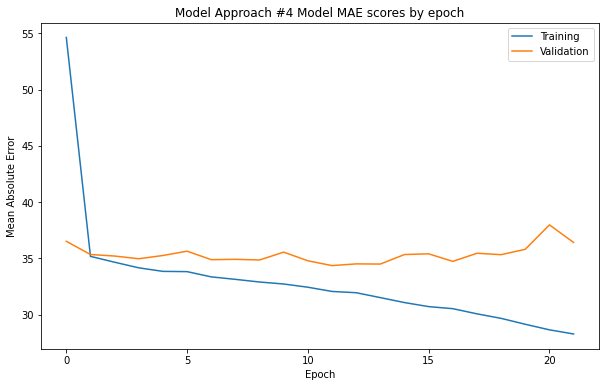

In [53]:
# Plot out the changes per epoch for the training and validation mae
plt.figure(figsize=(10,6))
plt.plot(mod4.epoch, mod4.history['mae'], label='Training')
plt.plot(mod4.epoch, mod4.history['val_mae'], label='Validation')
plt.legend()
plt.title('Model Approach #4 Model MAE scores by epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error');

## Modeling Approach #5
- Going to use the same model from approach 4.

- Going to add some dropout regularization to make sure it does not overfit.

In [54]:
# Create early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae', min_delta=0.75, patience=15, restore_best_weights=True
)

In [55]:
# Instatiate my 5th model approach
model5 = Sequential([
            Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.25),
            Dense(128, activation='relu'),
            Dropout(0.25),
            Dense(64, activation='relu'),
            Dropout(0.25),
            Dense(32, activation='relu'),
            Dense(1)
])

# Compile my 2nd model approach
model5.compile(loss='mean_squared_error',
               optimizer='adam',
               metrics=['mae'])

# Fit my 2nd model approach
mod5 = model5.fit(X_train, y_train,
                  batch_size=128,
                  epochs=300,
                  validation_split=0.1,
                  callbacks=[early_stop])

Epoch 1/300
111/111 [==============================] - 1s 5ms/step - loss: 12759.0726 - mae: 92.1203 - val_loss: 2694.9155 - val_mae: 35.8817
Epoch 2/300
111/111 [==============================] - 0s 4ms/step - loss: 2592.5319 - mae: 38.6731 - val_loss: 2616.7207 - val_mae: 35.0387
Epoch 3/300
111/111 [==============================] - 0s 4ms/step - loss: 2480.6552 - mae: 37.2848 - val_loss: 2520.9714 - val_mae: 34.8299
Epoch 4/300
111/111 [==============================] - 0s 4ms/step - loss: 2394.5302 - mae: 36.6698 - val_loss: 2437.5654 - val_mae: 34.6153
Epoch 5/300
111/111 [==============================] - 0s 4ms/step - loss: 2380.7892 - mae: 37.0030 - val_loss: 2440.5974 - val_mae: 34.7608
Epoch 6/300
111/111 [==============================] - 0s 3ms/step - loss: 2428.1277 - mae: 37.4138 - val_loss: 2366.8809 - val_mae: 34.8032
Epoch 7/300
111/111 [==============================] - 0s 4ms/step - loss: 2384.5543 - mae: 36.6282 - val_loss: 2327.7585 - val_mae: 34.5309
Epoch 8/300


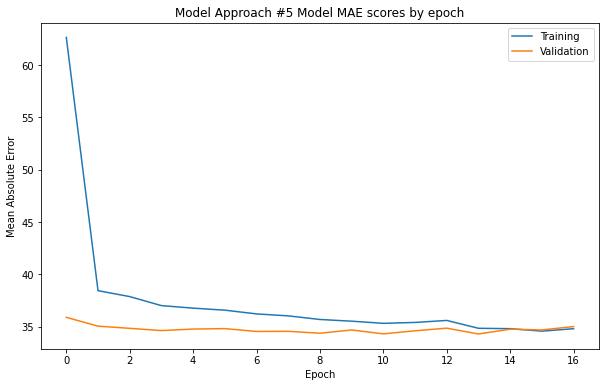

In [56]:
# Plot out the changes per epoch for the training and validation mae
plt.figure(figsize=(10,6))
plt.plot(mod5.epoch, mod5.history['mae'], label='Training')
plt.plot(mod5.epoch, mod5.history['val_mae'], label='Validation')
plt.legend()
plt.title('Model Approach #5 Model MAE scores by epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error');

In [57]:
# Use this model to evalute on my test set
model5.evaluate(X_test, y_test)

55/55 [==============================] - 0s 2ms/step - loss: 2168.9602 - mae: 34.4317


[2168.960205078125, 34.43174743652344]

## Model Approach #6

* `XGBRegressor` 

In [58]:
# Instantiate the model
xgbr = xgb.XGBRegressor(base_score=base_score, learning_rate=0.1, 
                        n_estimators=197, max_depth=21, gamma=0.5, subsample=0.5,
                        random_state=79, verbosity=0)

# Fit the model with an evaluation metric of `mae` for easier comparision
#   to my above models.
xgbr.fit(X_train, y_train, eval_metric='mae')

XGBRegressor(base_score=48.791831970214844, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0.5, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=21, min_child_weight=1, missing=None,
             n_estimators=197, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=79, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=0)

In [59]:
# Look at my training score
train_score = xgbr.score(X_train, y_train)
print(f'Training Score: {train_score}')

Training Score: 0.9984363426595724


In [60]:
# Look at the cross validation score
cv_score = cross_val_score(xgbr, X_train, y_train, cv=5)
print(f'Mean Cross-Validation Score: {cv_score.mean():.2f}')

Mean Cross-Validation Score: 0.40


In [61]:
# # Look at the kfold cross validation score
# kfold = KFold(n_splits=5, shuffle=True)
# kf_cv_score = cross_val_score(xgbr, X_train, y_train, cv=kfold )
# print(f'Mean K-fold Cross-Validation score: {kf_cv_score.mean():.2f}')

In [62]:
# Make a prediction on the test set and print the mean absolute error
y_pred = xgbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for Test Set: {mae:.2f}')

Mean Absolute Error for Test Set: 34.16


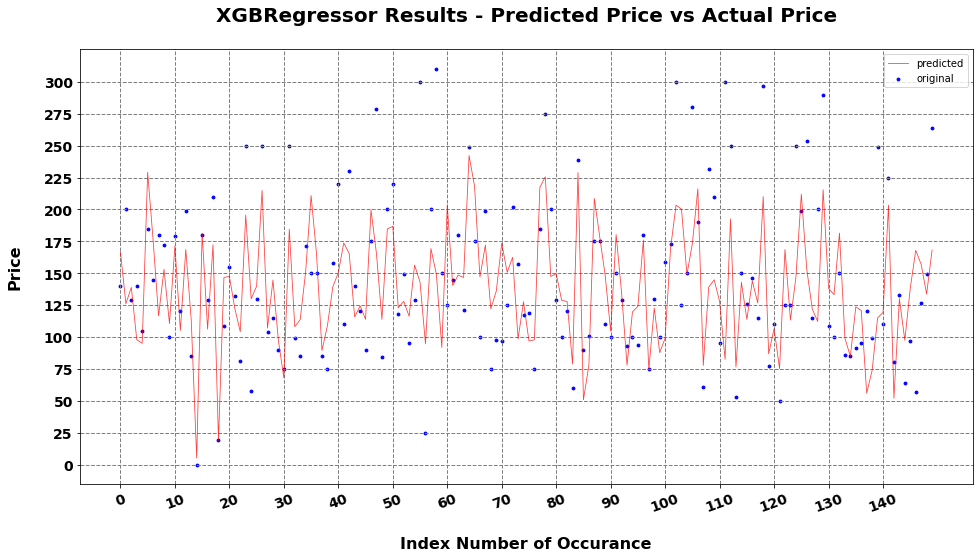

In [65]:
# Plot out the differences between the predicted values and true values
#   based on the test set values.
x_ax = range(150)
plt.figure(figsize=(16, 8))
plt.scatter(x_ax, y_test[:150], s=8, color="blue", label="original")
plt.plot(x_ax, y_pred[:150], lw=0.8, color="red", label="predicted", alpha=0.75)
plt.legend()
plt.title('XGBRegressor Results - Predicted Price vs Actual Price\n',
          size=20, weight='bold')
plt.xlabel(f'\nIndex Number of Occurance', size=16, weight='bold')
plt.ylabel(f'Price\n', size=16, weight='bold')
plt.xticks(np.arange(150, step=10), rotation=20, size=14, weight='bold')
plt.yticks(np.arange(0, y_test.max(), step=25), size=14, weight='bold')
plt.grid(color='grey', linestyle='--', linewidth=1);

## Model Approach #7

In [66]:
# Instantiate the model
xgbr = xgb.XGBRegressor(base_score=base_score, learning_rate=0.01, 
                        n_estimators=150, max_depth=9, gamma=0.25, subsample=0.5,
                        random_state=79, verbosity=0)

# Fit the model with an evaluation metric of `mae` for easier comparision
#   to my above models.
xgbr.fit(X_train, y_train, eval_metric='mae')

XGBRegressor(base_score=48.791831970214844, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0.25, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
             n_estimators=150, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=79, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=0)

In [67]:
# Look at my training score
train_score = xgbr.score(X_train, y_train)
print(f'Training Score: {train_score}')

Training Score: 0.43062528488680146


In [68]:
# Look at the cross validation score
cv_score = cross_val_score(xgbr, X_train, y_train, cv=9)
print(f'Mean Cross-Validation Score: {cv_score.mean():.2f}')

Mean Cross-Validation Score: 0.31


In [69]:
# # Look at the kfold cross validation score
# kfold = KFold(n_splits=9, shuffle=True)
# kf_cv_score = cross_val_score(xgbr, X_train, y_train, cv=kfold )
# print(f'Mean K-fold Cross-Validation score: {kf_cv_score.mean():.2f}')

Mean K-fold Cross-Validation score: 0.31


In [70]:
# Make a prediction on the test set and print the mean absolute error
y_pred = xgbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for Test Set: {mae:.2f}')

Mean Absolute Error for Test Set: 35.43


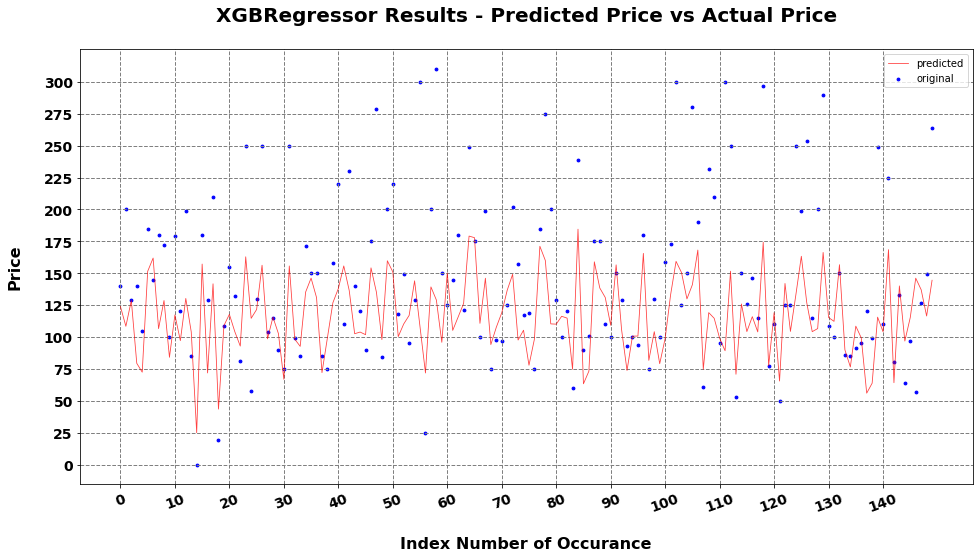

In [71]:
# Plot out the differences between the predicted values and true values
#   based on the test set values.
x_ax = range(150)
plt.figure(figsize=(16, 8))
plt.scatter(x_ax, y_test[:150], s=8, color="blue", label="original")
plt.plot(x_ax, y_pred[:150], lw=0.8, color="red", label="predicted", alpha=0.75)
plt.legend()
plt.title('XGBRegressor Results - Predicted Price vs Actual Price\n',
          size=20, weight='bold')
plt.xlabel(f'\nIndex Number of Occurance', size=16, weight='bold')
plt.ylabel(f'Price\n', size=16, weight='bold')
plt.xticks(np.arange(150, step=10), rotation=20, size=14, weight='bold')
plt.yticks(np.arange(0, y_test.max(), step=25), size=14, weight='bold')
plt.grid(color='grey', linestyle='--', linewidth=1);